<a href="https://colab.research.google.com/github/toufiqmusah/CALADAN/blob/main/Data_Preparation_CALADAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [44]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split

import torchvision
from torchvision.utils import make_grid
from torchvision import datasets, transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device, torch.__version__, os.cpu_count()

(device(type='cuda'), '2.2.1+cu121', 2)

GETTING DATA

In [ ]:
!gdown -qq 1F_k5qvgvPldUEPNlunM49inPnI8Ti8GY
!unzip -qq '/content/OCULAR-DISEASE-DATASET.zip'

In [34]:
data_df = pd.read_csv('/content/full_df.csv')

In [13]:
path = '/content/ODIR-5K/ODIR-5K'
img_name = data_df['filename'].iloc[0]
file = path + "Training Images/" + img_name

training_path = path + "Training Images/"

In [11]:
print(f"Train : {len(os.listdir('/content/ODIR-5K/ODIR-5K/Training Images'))}, Test : {len(os.listdir('/content/ODIR-5K/ODIR-5K/Testing Images'))}, Prepocess : {len(os.listdir('/content/preprocessed_images'))}")

Train : 7000, Test : 1000, Prepocess : 6392


In [20]:
data_df['labels'].unique()

array(["['N']", "['D']", "['O']", "['M']", "['H']", "['C']", "['A']",
       "['G']"], dtype=object)

Creating Dataset Folders

In [28]:
!mkdir ODIR-Dataset

In [38]:
label_map = { "['N']" : 'Normal', "['D']" : 'Diabetic Ret',
             "['G']" : 'Glaucoma', "['O']" : 'Other Disease',
             "['H']" : 'Hypertension', "['M']" : 'Myopia',
             "['A']" : 'AMD', "['C']" : 'Cataract'}

data_df['labels'] = data_df['labels'].map(label_map)

source_dir = '/content/preprocessed_images'
destination_dir = '/content/ODIR-Dataset'

def ensure_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

for index, row in data_df.iterrows():
    source_file = os.path.join(source_dir, row['filename'])
    label_dir = os.path.join(destination_dir, row['labels'])
    ensure_dir(label_dir)

    destination_file = os.path.join(label_dir, row['filename'])
    shutil.move(source_file, destination_file)

print("Files have been organized into label-based directories.")


Files have been organized into label-based directories.


In [ ]:
data_path = '/content/ODIR-Dataset'

Visualising Class Image Grids

In [51]:
data_transforms = transforms.Compose([transforms.Resize(size = (128, 128)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins = 5),
                                      transforms.ToTensor()])

all_data = datasets.ImageFolder(root = data_path, transform = data_transforms)

all_data_loader = DataLoader(all_data, batch_size = 64, shuffle = True)

Visualizing Some Data

(-0.5, 1041.5, 521.5, -0.5)

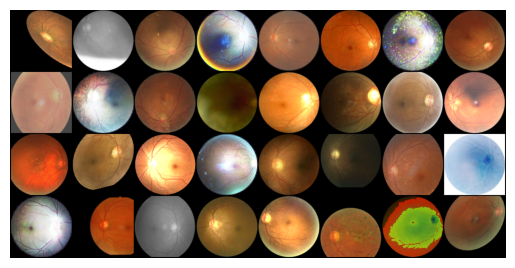

In [52]:
images, labels = next(iter(all_data_loader))
grid = make_grid(images[:32], normalize = True)
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')

Creating DataLoaders

In [58]:
batch_size = 64

train_data, test_data, valid_data = random_split(all_data, [0.7, 0.2, 0.1])

train_dataloader = DataLoader(train_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)
valid_dataloader = DataLoader(valid_data, batch_size = batch_size)

classes = all_data.classes

len(classes), train_dataloader, test_dataloader, valid_dataloader

(8,
 <torch.utils.data.dataloader.DataLoader at 0x7b23649f1840>)